In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [27]:
df = pd.read_csv(r'car_evaluation.csv')
df.sample(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
509,high,vhigh,4,more,big,low,unacc
275,vhigh,med,4,2,big,low,unacc
507,high,vhigh,4,more,med,med,unacc
436,high,vhigh,2,2,med,high,unacc
1222,med,low,3,2,big,high,unacc


In [28]:
df.shape

(1727, 7)

In [29]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [30]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [31]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [33]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [52]:
df['class'] = df['class'].replace({'good': 'acc', 'vgood': 'acc'})

In [54]:
df['class'].value_counts()

class
unacc    1209
acc       518
Name: count, dtype: int64

In [221]:
df.sample()

,buying,maint,doors,persons,lug_boot,safety,class
1250,med,low,4,4,small,low,unacc


In [223]:
x = df.drop(df.columns[-1],axis=1)
y = df['class']

In [12]:
from sklearn.preprocessing import OrdinalEncoder as oe
encoder = oe()
x_encode = encoder.fit_transform(x)
x1 = pd.DataFrame(x_encode,columns = encoder.get_feature_names_out(x.columns))
x1.sample()

,buying,maint,doors,persons,lug_boot,safety
505,0.0,3.0,2.0,2.0,2.0,0.0


In [13]:
## Label encoding
from sklearn.preprocessing import LabelEncoder as le
encoder = le()
y_encode = encoder.fit_transform(y)
y1 = pd.DataFrame(y_encode)
y1.sample()

,0
937,0


In [14]:
x1.dtypes

buying      float64
maint       float64
doors       float64
persons     float64
lug_boot    float64
safety      float64
dtype: object

In [15]:
y1.dtypes

0    int32
dtype: object

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1)

In [17]:
from sklearn.tree import DecisionTreeClassifier as dtc
clf = dtc(criterion = 'gini' , max_depth = 3 , random_state = 42)
clf_gini = clf.fit(x_train,y_train)
train_pred = clf_gini.predict(x_train)

In [18]:
## Accuracy test for train data
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,train_pred)
print(f" The Accuracy Score for train data prediction is {accuracy_train}")

 The Accuracy Score for train data prediction is 0.7814671814671814


In [19]:
## Accuracy test for test data
test_predict = clf_gini.predict(x_test)
accuracy_test = accuracy_score(y_test,test_predict)
print(f" The Accuracy Score for train data prediction is {accuracy_test}")

 The Accuracy Score for train data prediction is 0.7754629629629629


In [40]:
## Checking for overfit and underfit
print('Training data accuracy score : {:.4f}'.format(accuracy_train))
print('Test data accuracy score : {:.4f}'.format(accuracy_test))

Training data accuracy score : 0.7815
Test data accuracy score : 0.7755


## Visualisation of decision tree

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.453\nsamples = 1295\nvalue = [282, 50, 913, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 434\nvalue = [0, 0, 434, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.576\nsamples = 861\nvalue = [282, 50, 479, 50]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.648\nsamples = 286\nvalue = [144, 20, 72, 50]'),
 Text(0.125, 0.125, 'gini = 0.635\nsamples = 206\nvalue = [109, 20, 27, 50]'),
 Text(0.375, 0.125, 'gini = 0.492\nsamples = 80\nvalue = [35, 0, 45, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.439\nsamples = 575\nvalue = [138, 30, 407, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 286\nvalue = [0, 0, 286, 0]'),
 Text(0.875, 0.125, 'gini = 0.586\nsamples = 289\nvalue = [138, 30, 121, 0]')]

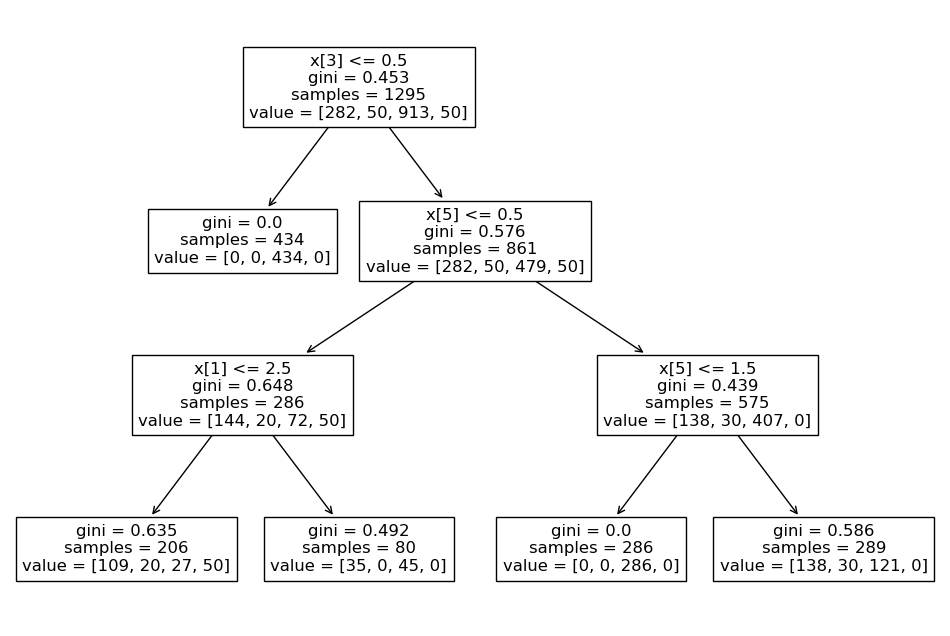

In [47]:
plt.figure(figsize = (12,8))
from sklearn import  tree
tree.plot_tree(clf.fit(x_train,y_train))

# Entrophy

In [59]:
ent = dtc(criterion = 'entropy',max_depth = 3 , random_state = 0)
ent.fit(x_train,y_train)

In [63]:
y_predict =  ent.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score
print('Model Accuracy with criterion entrophy : {:.4f}'.format(accuracy_score(y_test,y_predict)))

Model Accuracy with criterion entrophy : 0.7755


In [67]:
## Compare train and test accuracy
y_train_predict = ent.predict(x_train)

In [73]:
## Compare train and test accuracy score
print('train data accuracy score : {:.4f}'.format(accuracy_score(y_train_predict,y_train)))
print('test data accuracy score : {:.4f}'.format(accuracy_score(y_predict,y_test)))

train data accuracy score : 0.7815
test data accuracy score : 0.7755


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.197\nsamples = 1295\nvalue = [282, 50, 913, 50]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 434\nvalue = [0, 0, 434, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.475\nsamples = 861\nvalue = [282, 50, 479, 50]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.708\nsamples = 286\nvalue = [144, 20, 72, 50]'),
 Text(0.125, 0.125, 'entropy = 1.693\nsamples = 206\nvalue = [109, 20, 27, 50]'),
 Text(0.375, 0.125, 'entropy = 0.989\nsamples = 80\nvalue = [35, 0, 45, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.069\nsamples = 575\nvalue = [138, 30, 407, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 286\nvalue = [0, 0, 286, 0]'),
 Text(0.875, 0.125, 'entropy = 1.374\nsamples = 289\nvalue = [138, 30, 121, 0]')]

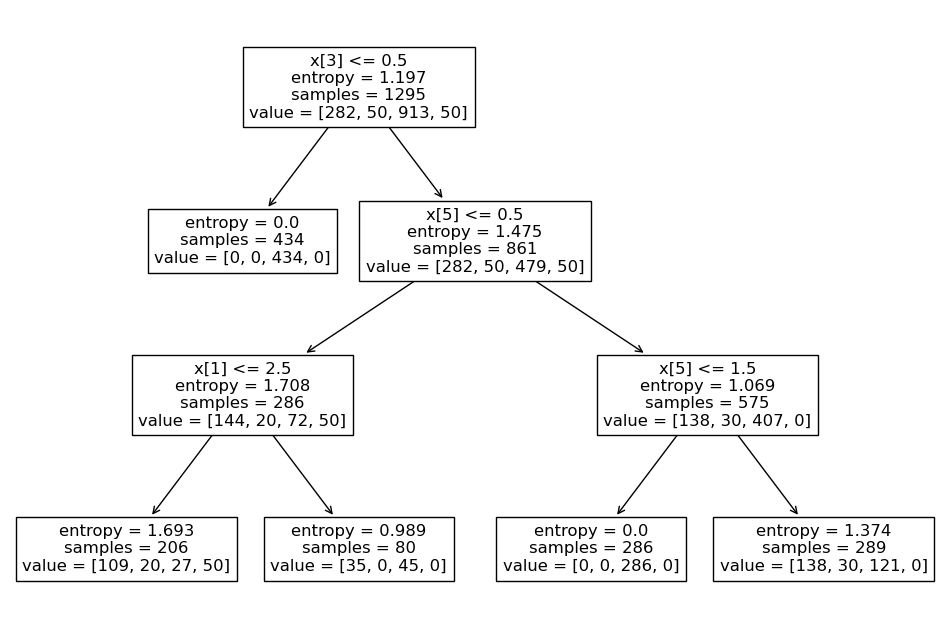

In [77]:
## visualisation of decision tree
from sklearn import tree
plt.figure(figsize = (12,8))
tree.plot_tree(ent.fit(x_train,y_train))

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 91,   0,  11,   0],
       [ 19,   0,   0,   0],
       [ 52,   0, 244,   0],
       [ 15,   0,   0,   0]], dtype=int64)

In [89]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.51      0.89      0.65       102
           1       0.00      0.00      0.00        19
           2       0.96      0.82      0.89       296
           3       0.00      0.00      0.00        15

    accuracy                           0.78       432
   macro avg       0.37      0.43      0.38       432
weighted avg       0.78      0.78      0.76       432



## Classification with KNNCLASSIFIER

In [141]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import f1_score

In [225]:

df1 = df
df1['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [231]:
df1['class'] = df1['class'].replace('vgood','acc')
df1['class'] = df1['class'].replace('good','acc')
df1['class'].value_counts()

class
unacc    1209
acc       518
Name: count, dtype: int64

In [233]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [247]:
x = df1.drop(df1.columns[-1],axis=1)
y = df1['class']
x.shape,y.shape

((1727, 6), (1727,))

In [261]:
from sklearn.preprocessing import OrdinalEncoder as oe
encode = oe()
x_code = encode.fit_transform(x)
x_code = pd.DataFrame(x_code,columns = encode.get_feature_names_out(x.columns))
x_code.sample()

,buying,maint,doors,persons,lug_boot,safety
317,3.0,2.0,3.0,2.0,1.0,1.0


In [263]:
from sklearn.preprocessing import LabelEncoder as le
encoder = le()
y_code = encoder.fit_transform(y)
y_code = pd.DataFrame(y_code)
y_code.sample(2)

,0
1662,0
53,1


In [269]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_code,y_code)

In [299]:
k_values = []
fscore = []
for k in range(3,18,2):
    th = 0.7
    knn = knc(n_neighbors = k)
    knn.fit(x_train,y_train)
    train_proba = knn.predict_proba(x_train)[:,1]
    train_pred = (train_proba >= th).astype('int')
    test_proba = knn.predict_proba(x_test)[:,1]
    test_pred = (test_proba >= th).astype('int')
    k_values.append(k)
    fscore.append(f1_score(y_test,test_pred))
print(k_values)
print(fscore)

[3, 5, 7, 9, 11, 13, 15, 17]
[0.8048780487804879, 0.9294755877034359, 0.9703315881326353, 0.9405405405405405, 0.9503546099290779, 0.9144981412639405, 0.942652329749104, 0.9395017793594307]


In [277]:
# best k value
import numpy as np
best_k = k_values[fscore.index(max(fscore))]
print(f" The best K value is : {best_k}")

 The best K value is : 7


[0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]

[0.8049792531120332, 0.8094575799721836, 0.8434782608695652, 0.9107981220657276, 0.959866220735786, 0.959866220735786, 0.9703315881326353, 0.8790786948176583, 0.5665024630541872, 0.5665024630541872]


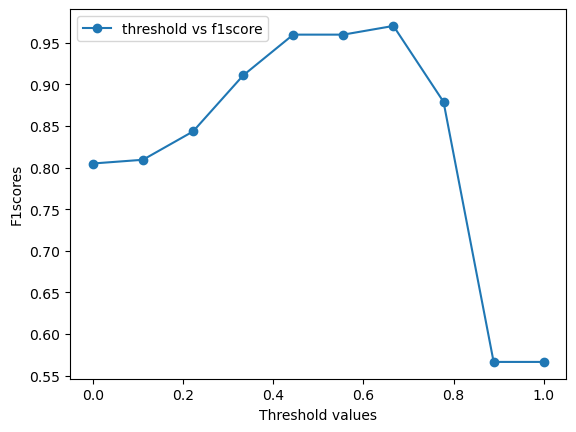

In [329]:
# find best threshold
k = 7
knn = knc(n_neighbors = k)
threshold = []
f1score = []
for th in np.linspace(0,1,10):
    knn.fit(x_train,y_train)
    train_proba = knn.predict_proba(x_train)[:,1]
    train_pred = (train_proba >= th).astype('int')
    test_proba = knn.predict_proba(x_test)[:,1]
    test_pred = (test_proba >= th).astype('int')
    f1score.append(f1_score(y_test,test_pred))
    threshold.append(th)
print(threshold)
print()
print(f1score)
plt.plot(threshold,f1score,marker = 'o',label = 'threshold vs f1score')
plt.xlabel('Threshold values')
plt.ylabel('F1scores')
plt.legend()
plt.show()

In [319]:
best_th = np.round(threshold[f1score.index(max(f1score))],1)
print(f" The best threshold is : {best_th}")

 The best threshold is : 0.7


In [339]:
# predict the data using hyper parameters k and threshold value
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix,recall_score
k = 7
th = 0.7
clf = knc(n_neighbors = k)
knn = clf.fit(x_train,y_train)
test_proba = knn.predict_proba(x_test)[:,1]
test_pred = (test_proba >= th).astype('int')
f1score = f1_score(y_test,test_pred)
precision = precision_score(y_test,test_pred)
recall = recall_score(y_test,test_pred)
accuracy = accuracy_score(y_test,test_pred)
confusion_mat = confusion_matrix(y_test,test_pred)
print(f" The f1score is {f1score} \n The accuracy_score is {accuracy} \n The precesion_score is {precision} \n The recall_value is {recall} \n The confusion matrix is \n  {confusion_mat}")

 The f1score is 0.9703315881326353 
 The accuracy_score is 0.9606481481481481 
 The precesion_score is 0.9858156028368794 
 The recall_value is 0.9553264604810997 
 The confusion matrix is 
  [[137   4]
 [ 13 278]]


## Logistic Regression

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [426]:
x = x_code[['maint']]
y = y_code

In [428]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [430]:
df1['proba'] = model.predict_proba(x)[:,1]

In [432]:
df_Roc = []

In [434]:
for threshold in np.arange(0,1.1,0.1):
    y_pred = (df['proba']>=threshold).astype('int')
    cm = confusion_matrix(y,y_pred)
    TP = cm[1, 1] 
    TN = cm[0, 0]
    FP = cm[0, 1] 
    FN = cm[1, 0] 
    
    # Calculate TPR and FPR
    TPR = TP / (TP + FN) 
    FPR = FP / (FP + TN) 
    df_Roc.append({'Threshold' : threshold , 'TP':TP,'TN':TN,'FP':FP,'FN':FN,'TPR':TPR,'FPR':FPR})
df3_Roc = pd.DataFrame( df_Roc)
print(df3_Roc)

    Threshold    TP   TN   FP    FN      TPR       FPR
0         0.0  1209    0  518     0  1.00000  1.000000
1         0.1  1209    0  518     0  1.00000  1.000000
2         0.2  1209    0  518     0  1.00000  1.000000
3         0.3  1209    0  518     0  1.00000  1.000000
4         0.4  1209    0  518     0  1.00000  1.000000
5         0.5  1209    0  518     0  1.00000  1.000000
6         0.6  1209    0  518     0  1.00000  1.000000
7         0.7   627  282  236   582  0.51861  0.455598
8         0.8     0  518    0  1209  0.00000  0.000000
9         0.9     0  518    0  1209  0.00000  0.000000
10        1.0     0  518    0  1209  0.00000  0.000000


In [436]:
# Finding auc value
auc = roc_auc_score(y,df['proba'])

In [438]:
print(df3_Roc)
print()
print('AUC :',auc)

    Threshold    TP   TN   FP    FN      TPR       FPR
0         0.0  1209    0  518     0  1.00000  1.000000
1         0.1  1209    0  518     0  1.00000  1.000000
2         0.2  1209    0  518     0  1.00000  1.000000
3         0.3  1209    0  518     0  1.00000  1.000000
4         0.4  1209    0  518     0  1.00000  1.000000
5         0.5  1209    0  518     0  1.00000  1.000000
6         0.6  1209    0  518     0  1.00000  1.000000
7         0.7   627  282  236   582  0.51861  0.455598
8         0.8     0  518    0  1209  0.00000  0.000000
9         0.9     0  518    0  1209  0.00000  0.000000
10        1.0     0  518    0  1209  0.00000  0.000000

AUC : 0.5472406117567408


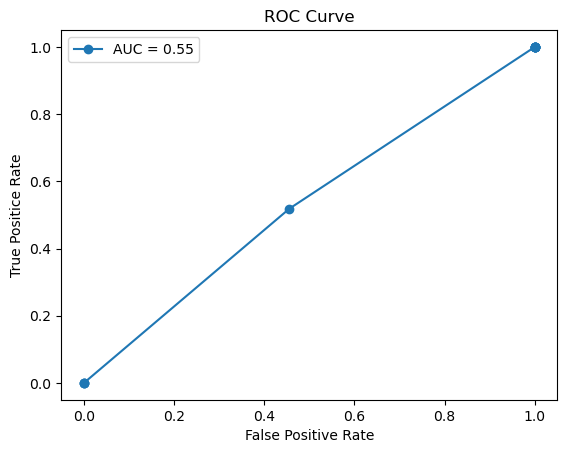

In [446]:
## plotting
plt.plot(df3_Roc['FPR'] , df3_Roc['TPR'] , label = f'AUC = {auc :.2F}',marker = 'o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positice Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

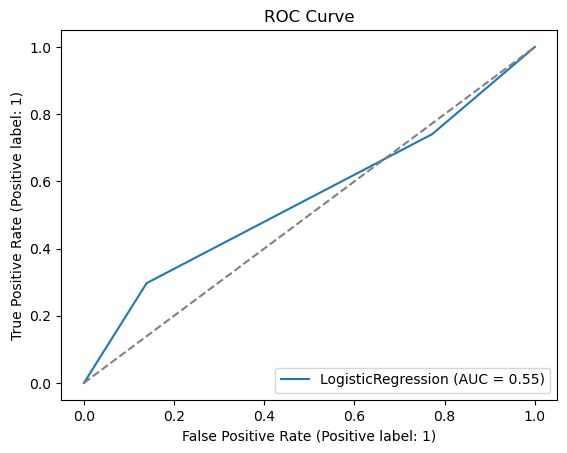

In [454]:
RocCurveDisplay.from_estimator(model, x, y)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve')
plt.show()

In [1]:
print(f'Accuracy score with Decision tree is 0.7755')
print(f'Accuracy score with KNNClassifier is 0.960')
print(f'Accuracy score with Logistic Regression is 0.547')

Accuracy score with Decision tree is 0.7755
Accuracy score with KNNClassifier is 0.960
Accuracy score with Logistic Regression is 0.547
